In [75]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [76]:
cv.getGaussianKernel(4, 1)

array([[0.12254251],
       [0.37745749],
       [0.37745749],
       [0.12254251]])

In [96]:
#Funcion para crear el kernel gaussiano y su transformada
def create_gauss_filter(h, w, k_size, sigma):
    k = cv.getGaussianKernel(h, sigma) @ cv.getGaussianKernel(w, sigma).T
    k /= k.sum()
    k_f = np.fft.fft2(k)
    k_f = np.fft.fftshift(k_f)
    k_f = np.abs(k_f)
                
    return k, k_f

In [78]:
create_gauss_filter(5,5,1,1)

(array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
        [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
        [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
        [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
        [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]]),
 array([[1.        , 0.46538013, 0.04116973, 0.04116973, 0.46538013],
        [0.46538013, 0.21657867, 0.01915958, 0.01915958, 0.21657867],
        [0.04116973, 0.01915958, 0.00169495, 0.00169495, 0.01915958],
        [0.04116973, 0.01915958, 0.00169495, 0.00169495, 0.01915958],
        [0.46538013, 0.21657867, 0.01915958, 0.01915958, 0.21657867]]))

In [79]:
# funciones auxiliares
def fft2_mod(image):

  shifted_image_fft = np.fft.fftshift(np.fft.fft2(image))
  return 20*np.log(np.abs(shifted_image_fft))


def _filter_round_shape(height, width, radius):
  canvas = np.zeros((height, width))
  return cv.circle(canvas,
                     center=(int(canvas.shape[1]/2), int(canvas.shape[0]/2)),
                     radius=radius,
                     color=(255),
                     thickness=-1).astype(np.uint8)


def create_lp_filter(height, width, radius=20):

  lp_filter = _filter_round_shape(height, width, radius)
  return lp_filter

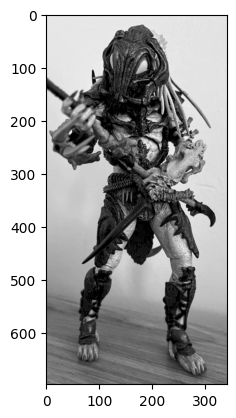

In [80]:
#Levanto la imagen
img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img, cmap = 'gray')
plt.show()

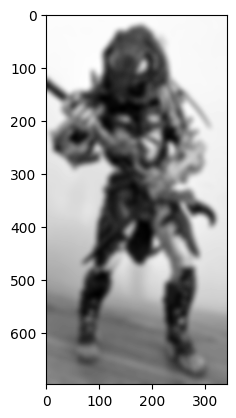

In [81]:
#Aplico filtro gaussiano
img_gauss = cv.filter2D(img, -1, create_gauss_filter(21,21,1,5)[0])
plt.figure()
plt.imshow(img_gauss, cmap = 'gray')
plt.show()

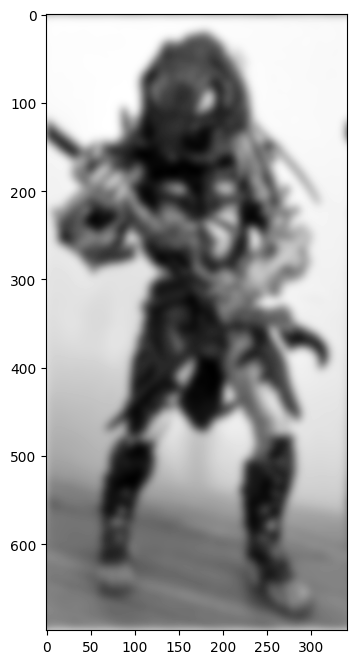

In [97]:
#Aplico filtro gaussiano con fft
img_fft = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
img_fft = np.fft.fft2(img_fft)
img_fft = np.fft.fftshift(img_fft)
#img_fft = 20*np.log(np.abs(img_fft))

h, w = img_fft.shape

gauss_fft = create_gauss_filter(h,w,1,5)[1]

img_fft_filtered = img_fft * gauss_fft

img_ifft = np.abs(np.fft.ifft2(np.fft.ifftshift(img_fft_filtered)))

plt.figure(figsize=(8,8))
plt.imshow(img_ifft, cmap='gray')
plt.show()

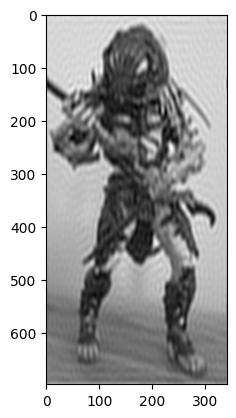

In [98]:
h, w = img.shape
lp_filter = create_lp_filter(h, w, radius=40)

shifted_fft = np.fft.fftshift(np.fft.fft2(img))
lp_filtered = shifted_fft * lp_filter

# Aplicamos la antitransformada y obtenemos las imagenes filtradas
f_ishift = np.fft.ifftshift(lp_filtered)
img_lp = np.real(np.fft.ifft2(f_ishift))

plt.figure()
plt.imshow(img_lp, cmap = 'gray')
plt.show()

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_25072\1916977517.py:5: RuntimeWarning: divide by zero encountered in log
  return 20*np.log(np.abs(shifted_image_fft))


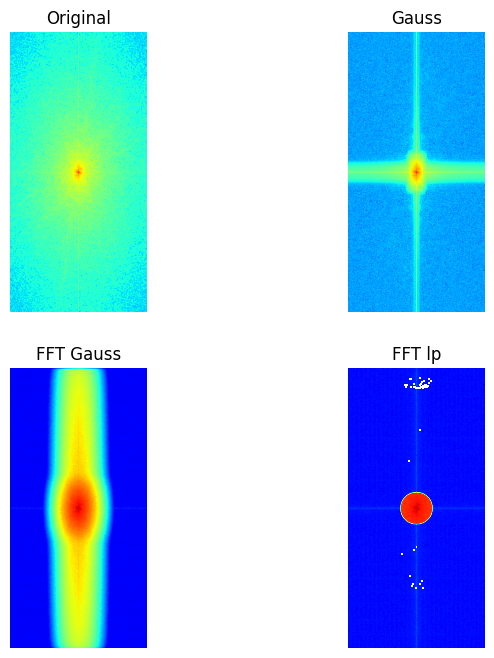

In [99]:
# obtengo el modulo de las transformadas de fourier y grafico
mod = fft2_mod(img)
mod_gauss = fft2_mod(img_gauss)
mod_fft = fft2_mod(img_ifft)
mod_lp = fft2_mod(img_lp)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Original')
plt.axis('off')
plt.imshow(mod, cmap='jet')

plt.subplot(2,2,2)
plt.title('Gauss')
plt.axis('off')
plt.imshow(mod_gauss, cmap='jet')

plt.subplot(2,2,3)
plt.title('FFT Gauss')
plt.axis('off')
plt.imshow(mod_fft, cmap='jet')

plt.subplot(2,2,4)
plt.title('FFT lp')
plt.axis('off')
plt.imshow(mod_lp, cmap='jet')

In [100]:
#Algoritmo de calidad de imagen
def img_quality_measure(input_img:np.ndarray):
    img_size = input_img.shape
    f = np.fft.fft2(input_img)
    fc = np.fft.fftshift(f)
    #af = 20*np.log(np.abs(fc))
    af = np.abs(fc)
    m = np.max(af)
    thresh = m / 1000
    th = np.count_nonzero(f > thresh)
    fm = th/(img_size[0] * img_size[1])

    return fm

In [101]:
print(img_quality_measure(img))
print(img_quality_measure(img_gauss))
print(img_quality_measure(img_ifft))
print(img_quality_measure(img_lp))

0.010263929618768328
0.002440991857758657
0.002214118259963532
0.006121385777546236


In [102]:
#Brenner’s focus measure (MIS2)
def brenner_focus_measure(input_img:np.ndarray):
    h, w = input_img.shape
    ret_val = 0
    for index, item in np.ndenumerate(input_img):
        if index[0] < w - 2:
            ret_val = ret_val + (input_img[index[0], index[1]] - input_img[index[0] + 2, index[1]]) ** 2
    return ret_val


In [103]:
print(brenner_focus_measure(img))
print(brenner_focus_measure(img_gauss))
print(brenner_focus_measure(img_ifft))
print(brenner_focus_measure(img_lp))

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_25072\3301029497.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  ret_val = ret_val + (input_img[index[0], index[1]] - input_img[index[0] + 2, index[1]]) ** 2


2010992276
1803771494
4046670.885970967
933342806513.4028


In [104]:
import random
#Local binary patterns-based measure (MIS6)
def lbp_measure(input_img:np.ndarray):
    h, w = input_img.shape
    r = 2
    n = 8
    ret_val = 0
    for index, item in np.ndenumerate(input_img):
        if (index[0] > r and index[0] < h - r) or (index[1] > r and index[1] < w - r):
            aux_sum = 0
            for i in range(n):
                x = random.randint(0, r)
                y = random.randint(0, r)
                if(input_img[index[0], index[1]] <= input_img[x,y]):
                    aux_sum = aux_sum + 1 
            ret_val = ret_val + aux_sum
    return ret_val

In [105]:
print(lbp_measure(img))
print(lbp_measure(img_gauss))
print(lbp_measure(img_ifft))
print(lbp_measure(img_lp))

1884152
1903064
1303830
1288273
